<div align="left">
<img src="https://www.udea.edu.co/wps/wcm/connect/udea/99fc43e7-7a64-45bd-97fc-96639b70813d/logosimbolo-vertical.png?MOD=AJPERES&CVID=ljeLvHr" width="100" height="130" align="left" style="margin-right: 50px">
</div>

# Computational Methods workshops

Workshop 02

<div align="right" style="width: 99.5%;">
Estiven Castrillon
</div>

<div style="width: 99.5%; border-bottom: 3px solid white;"></div>

# Taller 02 de métodos computacionales para físicos  y astronomos
- Universidad de Antioquia
- Estiven Castrillon Alzate 1040570656

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import time
from scipy import misc, optimize
from warnings import filterwarnings

filterwarnings('ignore')
plt.style.use('dark_background')

In [21]:
# Métodos para encontrar raíces de funciones 
def newton_rapson(funcion, punto_inicial: float, tolerancia: float=10e-5, max_iter: int=1_000):
    """
    Aplica el método de Newton-Raphson para encontrar una raíz de la función.

    Parámetros:
    - funcion: Función para la cual se busca una raíz.
    - punto_inicial: Valor inicial para comenzar la iteración.
    - tolerancia: Tolerancia para detener el algoritmo cuando el valor absoluto de la función en el punto inicial es menor que este valor.
    - max_iter: Número máximo de iteraciones permitidas.

    Retorna:
    - float: Aproximación de la raíz encontrada.
    """
    iteraciones = 0

    while (abs(funcion(punto_inicial)) > tolerancia) and (iteraciones <= max_iter):
        derivada = misc.derivative(funcion, punto_inicial, dx=10e-5)
        p = punto_inicial - (funcion(punto_inicial) / derivada) # Aplicación de la fórmula
        punto_inicial = p # Redefiniendo para hacer un proceso iterativo
        iteraciones += 1

    # Imprimir el resultado
    if iteraciones > max_iter:
        pass
    else:
        return punto_inicial, iteraciones
    
def secante(funcion, p_a: float, p_b: float, tolerancia: float=10e-5, max_iter: int=1_000):
    """
    Implementa el método de la secante para encontrar una raíz de la función dada.

    Parámetros:
    - funcion: La función para la cual se busca la raíz.
    - p_a: Punto inicial para el método.
    - p_b: Punto adicional necesario para el método.
    - tolerancia: La tolerancia para la convergencia del método.

    Retorna:
    - float: Aproximación de la raíz encontrada.
    """
    iteraciones = 0
    while (abs(funcion(p_a)) > tolerancia) and (iteraciones < max_iter):
        p_c = p_a - funcion(p_a) * (p_a - p_b) / (funcion(p_a) - funcion(p_b))
        p_a, p_b = p_c, p_a
        iteraciones += 1
    return p_a, iteraciones

def punto_fijo(funcion_gx, a: float, tolerancia: float = 10e-5, max_it:int = 1000) -> float:
    """
    Aplica el método de punto fijo para encontrar un punto fijo de la función.

    Parámetros:
    - funcion_gx: Función para la cual se busca un punto fijo.
    - a: Valor inicial para comenzar la iteración.
    - tolerancia: Tolerancia para detener el algoritmo cuando la distancia entre a y b es menor que este valor.

    Imprime:
    - Punto fijo encontrado.
    """
    b = funcion_gx(a)
    iteraciones = 0
    while (abs(b - a) > tolerancia) and (iteraciones < max_it):
        a = b
        b = funcion_gx(a)
        iteraciones += 1
 
    return b, iteraciones

# Aplicación método de bisección
def biseccion(funcion, intervalo: list[float], tolerancia: float=10e-5, max_it: int=1_000):
    """
    Aplica el método de bisección para encontrar una raíz de la función en el intervalo dado.

    Parámetros:
    - funcion: Función a la cual se le busca una raíz.
    - intervalo: Lista que representa el intervalo [a, b] donde se busca la raíz.
    - tolerancia: Tolerancia para detener el algoritmo cuando la diferencia entre a y b es menor que este valor.

    Retorna:
    - float: Aproximación de la raíz encontrada.
    """
    a, b = intervalo[0], intervalo[1]
    iteraciones = 0
    while (abs(b - a) > tolerancia) and (iteraciones < max_it): # Mientras que la longitud del intervalo sea menor a la tolerancia
        if funcion(a) * funcion(b) < 0: # Ver cambio de signo
            punto_medio = (a + b) / 2 # Calcular punto medio

            #Proceso iterativo de definición de punto medio como a o b si la multiplicación es negativa
            if funcion(a) * funcion(punto_medio) < 0:
                b = punto_medio
            elif funcion(punto_medio) * funcion(b) < 0:
                a = punto_medio
            iteraciones += 1
        else:
            print('El intervalo que escogió no tiene raíces')
            break

    # Impresión del resultado
    return a, iteraciones

**1** En mecánica orbital, al resolver el problema de la fuerza central se hace necesario resolver la ecuación de Kepler. Esta es una ecuación trascendental que relaciona los parámetros orbitales de la trayectoria.

*Kepler equation:* $M = E - \epsilon \sin E$

donde $ M $ es la anomalía media, $ E $ la anomalía excéntrica y $ \epsilon $ la excentricidad. La anomalía media se puede calcular con la expresión

$$M = n\ t = \sqrt{ \frac{GM_c}{a^3} } t$$

donde $ n $ es el movimiento medio, $ G $ la constante gravitacional, $ M_c $ la masa del cuerpo central y $ a $ el eje semi-mayor. $ t $ es el tiempo en que se calculará la posición en la trayectoria.

Las coordenadas $ x $ y $ y $ como funciones de tiempo se pueden recuperar mediante las siguientes expresiones

$$x(t) = a(\cos E - \epsilon)$$

$$y(t) = b\sin E$$

donde $ b = a \sqrt {1- \epsilon ^ 2} $ es el eje semi-menor de la órbita y la dependencia temporal implícita de la anomalía excéntrica $ E $ se calcula a través de la ecuación de Kepler.

**Problem:**

**a)** Para una estrellita que orbita la Tierra en una trayectoria ecuatorial con excentricidad $ \epsilon = 0.5 $ a una distancia geoestacionaria para el eje semi-mayor, tabule las posiciones $ x $ y $ y $ dentro del plano orbital en intervalos de $ 15 $ min durante $ 5 $ horas, graficar x y y.

**b)** Encuentre cuanto tarda el cuerpo en dar una vuelta completa.

**Parameters:**

- $\epsilon = 0.5$

- $a = 35900$ km

- $G = 6.67384 \times 10^{-11}$ $m^3$ $kg^{-1}$ $s^{-2}$

- $M_{\oplus} = 5.972\times 10^{24} kg$

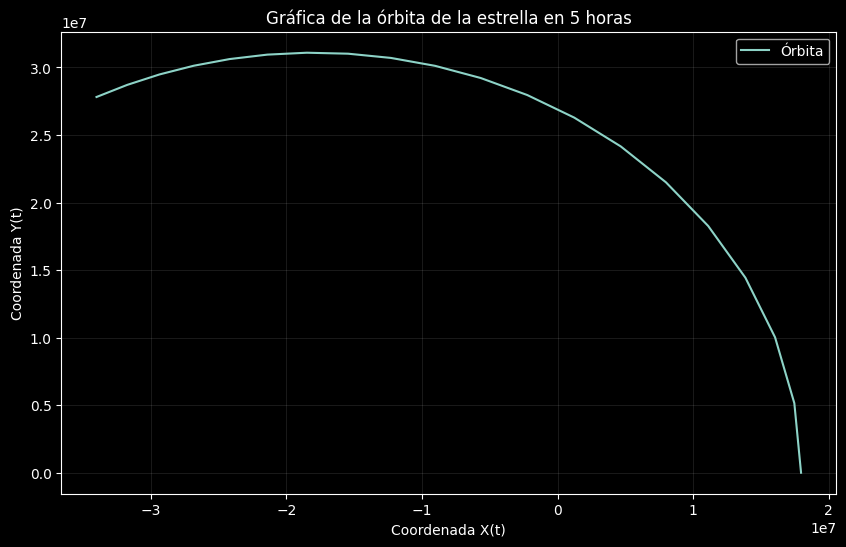

In [22]:
# Definición de parámetros
excentricidad = 0.5
a = 35_900_000
G = 6.67384e-11
M_c = 5.972e24
b = a * np.sqrt(1 - excentricidad**2)

# a) Estrella que orbita la Tierra
intervalos = np.arange(0, 18000, 900) # Intervalos de 15 minutos en 5 horas

# Ecuación M = n * t = sqrt(G * M_c / a**3) * t
def anomalia_med(t, G, masa_cuerpo, a):
    return np.sqrt(G * masa_cuerpo / a**3) * t

def ecuacion_kepler_cero(E, M, excentricidad):
    return E - excentricidad * np.sin(E) - M

M = np.array([anomalia_med(t, G, M_c, a) for t in intervalos]) # Anomalía media
E = np.array([]) # Array vacío para almacenar las anomalías excéntricas

for i in range(len(M)):
    anomalia_exc, _ = newton_rapson(lambda x: ecuacion_kepler_cero(x, M[i], excentricidad), 0.5) # Aplicando el método de Newton-Raphson
    E = np.append(E, anomalia_exc) # Añadiendo a la lista

# Gráfica de la órbita en intervalos de 15 minutos
coordenadax = a * (np.cos(E) - excentricidad)
coordenaday = b * np.sin(E)

plt.figure(figsize=(10,6))
plt.plot(coordenadax, coordenaday, label='Órbita')
plt.title('Gráfica de la órbita de la estrella en 5 horas') 
plt.xlabel('Coordenada X(t)')
plt.ylabel('Coordenada Y(t)')
plt.grid(True, alpha=0.1) 
plt.legend()
plt.show()

In [23]:
# b) ¿Cuánto tiempo tarda la estrella en dar una vuelta completa?
T = 2 * np.pi * np.sqrt(a**3 / (G * M_c))
print(f'El tiempo que tarda la estrella en dar una vuelta completa es de {T:.1f} segundos, {T / 60 / 60:.1f} horas')

El tiempo que tarda la estrella en dar una vuelta completa es de 67697.7 segundos, 18.8 horas


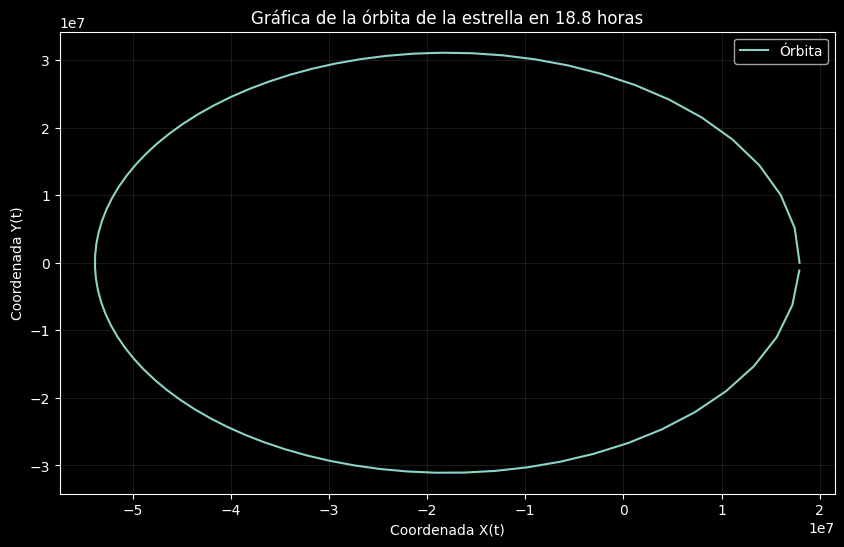

In [24]:
# a) Órbita completa
intervalos = np.arange(0, 67697, 900) # Intervalos de 15 minutos en 5 horas
M = np.array([anomalia_med(t, G, M_c, a) for t in intervalos]) # Anomalía media
E = np.array([]) # Array vacío para almacenar las anomalías excéntricas

for i in range(len(M)):
    anomalia_exc, _ = newton_rapson(lambda x: ecuacion_kepler_cero(x, M[i], excentricidad), 0.5) # Aplicando el método de Newton-Raphson
    E = np.append(E, anomalia_exc) # Añadiendo a la lista

# Gráfica de la órbita en intervalos de 15 minutos
coordenadax = a * (np.cos(E) - excentricidad)
coordenaday = b * np.sin(E)

plt.figure(figsize=(10,6))
plt.plot(coordenadax, coordenaday, label='Órbita')
plt.title('Gráfica de la órbita de la estrella en 18.8 horas') 
plt.xlabel('Coordenada X(t)')
plt.ylabel('Coordenada Y(t)')
plt.grid(True, alpha=0.1) 
plt.legend()
plt.show()

**2** Se planea hacer una antena con una  barra de longitud $l$, la cual está localizada a lo largo del eje $x$ y tiene una carga neta $Q$. Se puede demostrar que el potencial a un punto con coordenadas $P = (0,d)$ es dado por

$$V=  \frac{kQ}{l} \ln⁡\left(\frac{l+\sqrt{l^2+d^2}}{d}\right)$$

**a)** Grafique la función, ¿cuántas raíces hay? (use `l = np.arange(0, 2.0, 0.001))`.
De un valor aproximado a partir de la gráfica $d=0.3$ m  (use $kQ=1$ ).

**b)**. Usando el método de la Secante calcule la longitud de la barra que produce un potencial de $0.5$ V  a una distancia en $d=0.3$ m  (use $kQ=1$ ).

**c)**. Usando un p_o de su elección, ¿Cuántas iteraciones son necesarias para hallar $l$ con un error menor que $10^{-8}$?

**d)**. Elija un intervalo $(a,b)$ y corrobore su resultado usando el método de bisección ¿Cuántas iteraciones son necesarias para hallar la longitud con un error menor que $10^{-5}$ ?


Solución:
$$l=  \frac{kQ}{V} \ln⁡\left(\frac{l+\sqrt{l^2+d^2}}{d}\right)$$
que define la ecuación de punto fijo $l=g(l)$ o también el problema de raíces,

$$f(l) = l - \frac{kQ}{V} \ln⁡\left(\frac{l+\sqrt{l^2+d^2}}{d}\right)=0,$$

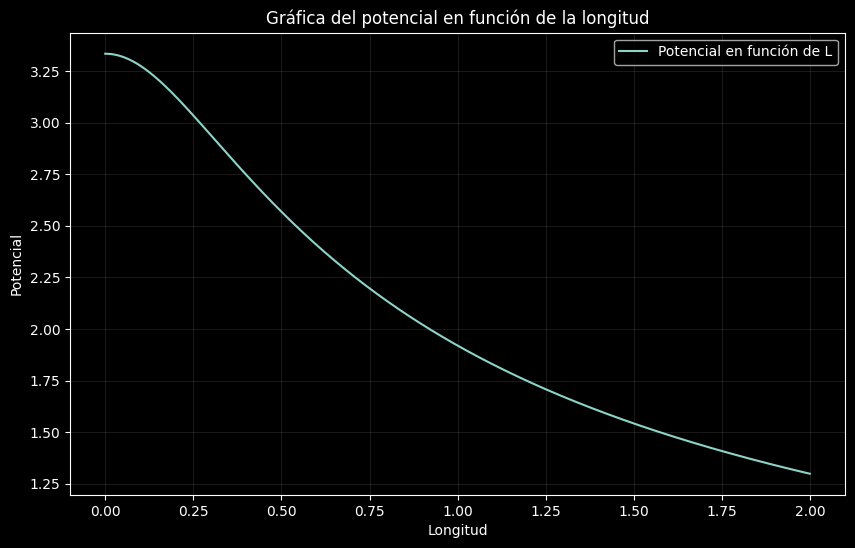

La función no tiene raíces ya que solamente se hace cero en el infinito


In [25]:
# a) Gráfica de la función
# Definición de parámetros
d = 0.3
kQ = 1
l = np.arange(1e-10, 2.0, 0.001)

def potencial(kQ, d, l):
    return (kQ / l) * np.log((l + np.sqrt(l**2 + d**2)) / d)

# Plot the function
plt.figure(figsize=(10,6))
plt.plot(l, potencial(kQ, d, l), label='Potencial en función de L')
plt.title('Gráfica del potencial en función de la longitud')
plt.xlabel('Longitud')
plt.ylabel('Potencial')
plt.grid(True, alpha=0.1)
plt.legend()
plt.show()
print(f'La función no tiene raíces ya que solamente se hace cero en el infinito')

In [26]:
# b) Método de la Secante para calcular la longitud de la barra
V = 0.5
def potencial_cero(l):
    return (kQ / l) * np.log((l + np.sqrt(l**2 + d**2)) / d) - V

raiz_secante, iteraciones = secante(potencial_cero, 0.5, 7)
print(f'La longitud de la barra es de {raiz_secante} metros, con {iteraciones} iteraciones')

La longitud de la barra es de 7.938349081063987 metros, con 5 iteraciones


In [27]:
# c) Usando un p_o de su elección, ¿Cuántas iteraciones son necesarias para hallar $l$ con un error menor que 10^-8?
# Suponinedo que se refiere al método de punto fijo
# Definición de la función gx tal que g(x) = x data f(x)

def gx(l):
    return (kQ / V) * np.log((l + np.sqrt(l**2 + d**2)) / d)

V = 0.5
p_0 = 2

raiz_punto_fijo, iteraciones = punto_fijo(gx, p_0, 10e-8)
print(f'El valor de la raíz es {raiz_punto_fijo} y se necesitaron {iteraciones} iteraciones para encontrarla.')

El valor de la raíz es 7.938369452544836 y se necesitaron 14 iteraciones para encontrarla.


In [28]:
# b) Método de bisección ¿Cuántas iteraciones son necesarias para hallar la longitud con un error menor que 10^-5?
intervalo = [1, 8]
raiz_biseccion, iteraciones = biseccion(potencial_cero, intervalo, 10e-5)
print(f'El valor de la raíz es {raiz_biseccion} y se necesitaron {iteraciones} iteraciones para encontrarla.')

El valor de la raíz es 7.938316345214844 y se necesitaron 17 iteraciones para encontrarla.


**3** Considere un resorte con un extremo pegado a una pared y al otro extremo se le aplica una fuerza constante de 2N, si la resorte opone una fuerza de resistencia a la deformación dada por $F=k(x)x=exp(x)x$,

**a)** calcule el valor para el cual las fuerzas se equilibran.

**b)** considere que el resorte se le cuelga un peso $W=1 Kg$ , calcule las distancias $(x,y)$ de equilibrio.

In [29]:
# a) Calcule el valor para el cual las fuerzas se equilibran.
# Definición de parámetros
fuerza_constante = 2

def fuerza_restorte(x):
    return x * np.exp(x)

def fuerzas_equilibradas(x):
    return x * np.exp(x) - fuerza_constante

# Las fuerzas se equilibran cuando la fuerza del resorte es igual a la fuerza constante
# Es decir, x * e^x = 2, lo que es equivalente a x * e^x - 2 = 0

raiz_secante, iteraciones = secante(fuerzas_equilibradas, 0.5, 1.5)
print(f'El valor de la raíz es {raiz_secante} y se necesitaron {iteraciones} iteraciones para encontrarla.')

El valor de la raíz es 0.8526065474593222 y se necesitaron 5 iteraciones para encontrarla.


In [30]:
# b) Considere que el resorte se le cuelga un peso W=1 kg, calcule las distancias (x,y) de equilibrio.
# Definición de parámetros
W = 1
g = 9.8

raiz_secante, iteraciones = secante(lambda x: fuerza_restorte(x) - W * g, 0.5, 1.5)
print(f'El valor de la raíz es {raiz_secante} y se necesitaron {iteraciones} iteraciones para encontrarla.')

El valor de la raíz es 1.7326971748438411 y se necesitaron 6 iteraciones para encontrarla.


**4** **a)** Consulte e implemente el python el algoritmo de la falsa posición para encontrar raíces.

**b)** Repita el ejercicio anterior usando todos los métodos vistos y consultados, compare el número de iteraciones y el tiempo te computo de cada uno.

In [31]:
# a) Consulte e implemente el python el algoritmo de la falsa posición para encontrar raíces.

def falsa_posicion(funcion, intervalo: list[float], tolerancia: float=10e-5, max_it: int=1_000):
    """
    Aplica el método de la falsa posición para encontrar una raíz de la función en el intervalo dado.

    Parámetros:
    - funcion: Función a la cual se le busca una raíz.
    - intervalo: Lista que representa el intervalo [a, b] donde se busca la raíz.
    - tolerancia: Tolerancia para detener el algoritmo cuando la diferencia entre a y b es menor que este valor.

    Retorna:
    - float: Aproximación de la raíz encontrada.
    """
    a, b = intervalo[0], intervalo[1]
    iteraciones = 0
    while (abs(b - a) > tolerancia) and (iteraciones < max_it): # Mientras que la longitud del intervalo sea menor a la tolerancia
        if funcion(a) * funcion(b) < 0: # Ver cambio de signo
            punto_medio = a - (funcion(a) * (b - a)) / (funcion(b) - funcion(a)) # Calcular punto medio

            #Proceso iterativo de definición de punto medio como a o b si la multiplicación es negativa
            if funcion(a) * funcion(punto_medio) < 0:
                b = punto_medio
            elif funcion(punto_medio) * funcion(b) < 0:
                a = punto_medio
            iteraciones += 1
        else:
            print('El intervalo que escogió no tiene raíces')
            break

    # Impresión del resultado
    return a, iteraciones

In [32]:
# b)Repita el ejercicio anterior usando todos los métodos vistos y consultados, compare el número de iteraciones y el tiempo te computo de cada uno.

# Definir los puntos iniciales y la tolerancia
punto_inicial = 0
p_a = 0
p_b = 1
tolerancia = 10e-5

# Aplicar el método de Newton-Raphson
inicio = time.time()
raiz_newton, iteraciones_newton = newton_rapson(fuerzas_equilibradas, punto_inicial, tolerancia)
fin = time.time()
print(f'Newton-Raphson: raíz = {raiz_newton}, iteraciones = {iteraciones_newton}, tiempo = {fin - inicio} segundos')

# Aplicar el método de la secante
inicio = time.time()
raiz_secante, iteraciones_secante = secante(fuerzas_equilibradas, p_a, p_b, tolerancia)
fin = time.time()
print(f'Secante: raíz = {raiz_secante}, iteraciones = {iteraciones_secante}, tiempo = {fin - inicio} segundos')

# Aplicar el método de punto fijo
inicio = time.time()
gx = lambda x: 2 / np.exp(x) # Forma g(x) = x de la función que dieron
raiz_punto_fijo, iteraciones_punto_fijo = punto_fijo(gx, punto_inicial, tolerancia)
fin = time.time()
print(f'Punto Fijo: raíz = {raiz_punto_fijo}, iteraciones = {iteraciones_punto_fijo}, tiempo = {fin - inicio} segundos')

# Aplicar el método de bisección
inicio = time.time()
raiz_biseccion, iteraciones_biseccion = biseccion(fuerzas_equilibradas, [p_a, p_b], tolerancia)
fin = time.time()
print(f'Bisección: raíz = {raiz_biseccion}, iteraciones = {iteraciones_biseccion}, tiempo = {fin - inicio} segundos')

# Aplicar el método de falsa posición
inicio = time.time()
raiz_falsa_posicion, iteraciones_falsa_posicion = falsa_posicion(fuerzas_equilibradas, [p_a, p_b], tolerancia)
fin = time.time()
print(f'Falsa Posición: raíz = {raiz_falsa_posicion}, iteraciones = {iteraciones_falsa_posicion}, tiempo = {fin - inicio} segundos')

Newton-Raphson: raíz = 0.8526056238060726, iteraciones = 6, tiempo = 0.0009982585906982422 segundos
Secante: raíz = 0.8526110196266425, iteraciones = 5, tiempo = 0.0 segundos
Punto Fijo: raíz = 0.8525629536100656, iteraciones = 61, tiempo = 0.0 segundos
Bisección: raíz = 0.85260009765625, iteraciones = 14, tiempo = 0.0010094642639160156 segundos
Falsa Posición: raíz = 0.8526055020137254, iteraciones = 1000, tiempo = 0.014990806579589844 segundos
